In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
color = sns.color_palette()

In [2]:
# read training data
train_data = pd.read_csv('train.csv')
# read testing data
test_data = pd.read_csv('test.csv')
# read training data period
periods_train = pd.read_csv('periods_train.csv')
# read testing data period
periods_test = pd.read_csv('periods_test.csv')

In [3]:
# display train/test shape
print("size of train data", train_data.shape)
print("size of test data", test_data.shape)
print("size of periods_train data", periods_train.shape)
print("size of periods_test data", periods_test.shape)

size of train data (1503424, 18)
size of test data (508438, 17)
size of periods_train data (16687412, 4)
size of periods_test data (13724922, 4)


In [5]:
train_data.isnull().sum()

item_id                      0
user_id                      0
region                       0
city                         0
parent_category_name         0
category_name                0
param_1                  61576
param_2                 654542
param_3                 862565
title                        0
description             116276
price                    85362
item_seq_number              0
activation_date              0
user_type                    0
image                   112588
image_top_1             112588
deal_probability             0
dtype: int64

In [17]:
len(train_data['image'].unique())

1390837

In [8]:
test_data.isnull().sum()

item_id                      0
user_id                      0
region                       0
city                         0
parent_category_name         0
category_name                0
param_1                  22910
param_2                 233229
param_3                 306331
title                        0
description                  0
price                    30585
item_seq_number              0
activation_date              0
user_type                    0
image                    42609
image_top_1              42609
dtype: int64

In [43]:
periods_train.isnull().sum()

item_id               0
activation_date    5790
date_from             0
date_to               0
dtype: int64

In [44]:
periods_test.isnull().sum()

item_id               0
activation_date    5043
date_from             0
date_to               0
dtype: int64

In [45]:
periods_train.head(10)

,item_id,activation_date,date_from,date_to
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28
5,47081d25b7cb,2017-02-19,2017-03-15,2017-03-20
6,5a328b4a8be1,2017-02-20,2017-03-15,2017-03-21
7,87292b76e4e1,2017-03-17,2017-03-17,2017-03-28
8,2ccefc8a940b,2017-02-19,2017-03-15,2017-03-21
9,ded64e61cd85,2017-03-13,2017-03-15,2017-03-28


In [46]:
train_data.head(10)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,day_of_month,day_of_week
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,28,1
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,26,6
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,20,0
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,25,5
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,16,3
5,51e0962387f7,bbfad0b1ad0a,Татарстан,Чистополь,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Авто люлька,В хорошем состоянии,1300.0,9,2017-03-28,Private,eb6ad1231c59d3dc7e4020e724ffe8e4d302023ddcbb99...,796.0,0.80323,28,1
6,c4f260a2b48a,08f469d2e6f7,Нижегородская область,Нижний Новгород,Для дома и дачи,Ремонт и строительство,Сантехника и сауна,NaN,NaN,Водонагреватель 100 литров нержавейка плоский,Электро водонагреватель накопительный на 100 л...,11000.0,125,2017-03-23,Private,0330f6ac561f5db1fa8226dd5e7e127b5671d44d075a98...,2823.0,0.00000,23,3
7,6b71309d6a8a,fef86baa002c,Пермский край,Пермь,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Джинсы,26,Бойфренды colins,Бойфренды в хорошем состоянии.,500.0,61,2017-03-25,Private,9bab29a519e81c14f4582024adfebd4f11a4ac71d323a6...,567.0,0.80323,25,5
8,c5b969cb63a2,055825270190,Оренбургская область,Оренбург,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Платья и юбки,> 50 (XXL),Платье,54 раз мер очень удобное,500.0,85,2017-03-17,Private,75ce06d1f939a31dfb2af8ac55f08fa998fa336d13ee05...,415.0,0.00000,17,4
9,b1570962e68c,f9e8f831d94c,Нижегородская область,Нижний Новгород,Личные вещи,Детская одежда и обувь,Для девочек,Обувь,25,Полу ботиночки замш натур.Бамбини,По стельке 15.5см мерить приокский район. Цвет...,400.0,136,2017-03-22,Company,54fb8521135fda77a860bfd2fac6bf46867ab7c06796e3...,46.0,0.00000,22,2


In [72]:
# checking missing data in training data 
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head(10)

,Total,Percent
param_3,862565,57.373369
param_2,654542,43.536753
description,116276,7.734079
image,112588,7.488772
image_top_1,112588,7.488772
price,85362,5.677839
param_1,61576,4.095718
category_name,0,0.000000
user_id,0,0.000000
region,0,0.000000


In [81]:
train_data.describe()

,price,item_seq_number,image_top_1,deal_probability
count,1.418062e+06,1.503424e+06,1.390836e+06,1.503424e+06
mean,3.167081e+05,7.436740e+02,1.241932e+03,1.391306e-01
std,6.689154e+07,5.572522e+03,9.704641e+02,2.600785e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+02,9.000000e+00,4.250000e+02,0.000000e+00
50%,1.300000e+03,2.900000e+01,1.057000e+03,0.000000e+00
75%,7.000000e+03,8.800000e+01,2.217000e+03,1.508700e-01
max,7.950101e+10,2.044290e+05,3.066000e+03,1.000000e+00


Text(0.5,1,'Histogram of likelihood that an ad actually sold something')

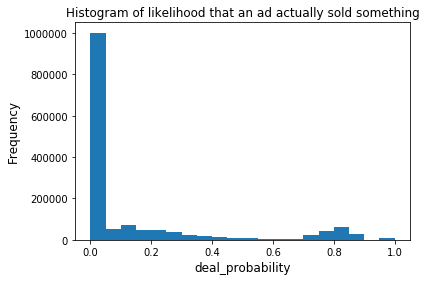

In [80]:
train_data['deal_probability'].plot.hist(bins=20)
plt.xlabel('deal_probability', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Histogram of likelihood that an ad actually sold something")

In [94]:
print ('deal_prob is zero: ', (str((train_data['deal_probability'] == 0).sum() / len(train_data))))

deal_prob is zero:  0.6482655591503129


Text(0.5,1,'Histogram of Price')

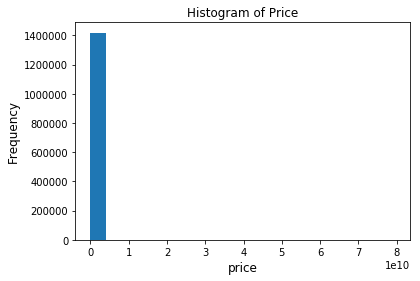

In [99]:
train_data['price'].plot.hist(bins=20)
plt.xlabel('price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Histogram of Price")

In [83]:
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline

In [108]:
train_data['deal_class'] = train_data['deal_probability'].apply(lambda x: ">=0.399" if x >=0.399 else "<0.399")
temp = train_data['deal_class'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Distribution of Deal Class')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

del train_data['deal_class']

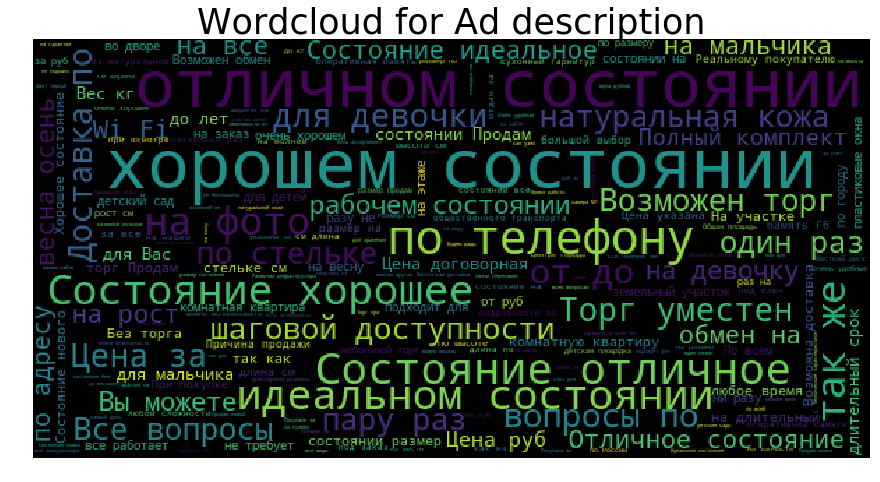

In [155]:
from wordcloud import WordCloud, STOPWORDS
names = train_data["description"][~pd.isnull(train_data["description"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)$
plt.title("Wordcloud for Ad description", fontsize=35)
plt.axis("off")
plt.show() 

In [162]:
import copy
temp_dict = copy.deepcopy(wordcloud.words_)

In [186]:
from googletrans import Translator
translator = Translator()

for item in temp_dict.keys():
    if isinstance(item, str):
        temp_name = translator.translate(str(item), dest='En').text
        temp_dict[temp_name] = temp_dict.pop(item)
    else:
        pass

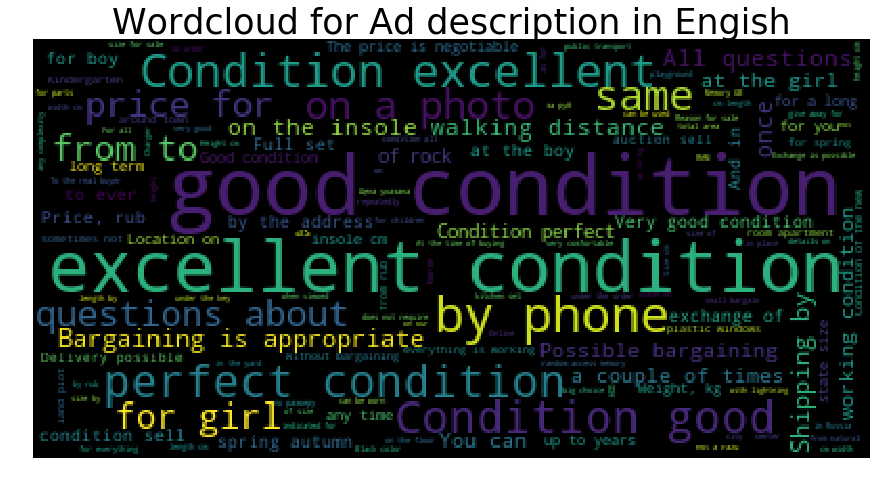

In [204]:
wc = WordCloud().generate_from_frequencies(temp_dict)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.title("Wordcloud for Ad description in Engish", fontsize=35)
plt.axis("off")
plt.show() 

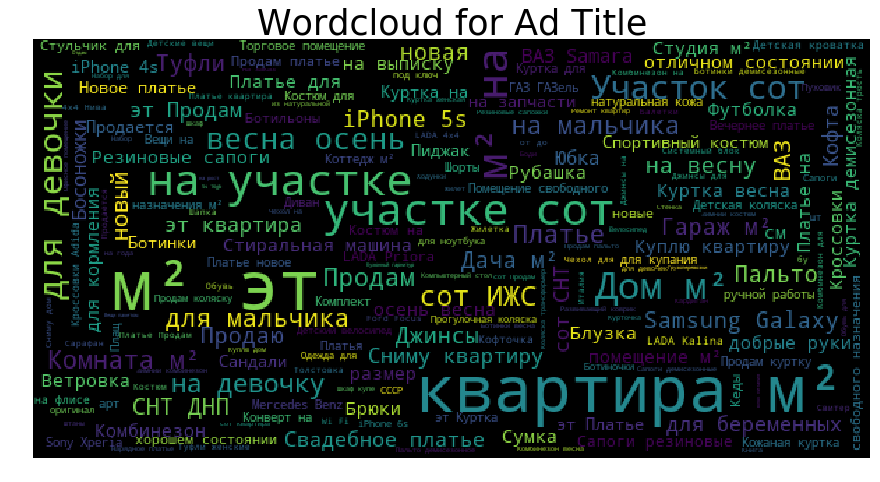

In [205]:
titles = train_data["title"][~pd.isnull(train_data["title"])]
wordcloud2 = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(titles))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud2)
plt.title("Wordcloud for Ad Title", fontsize=35)
plt.axis("off")
plt.show() 

In [206]:
import copy
temp_dict2 = copy.deepcopy(wordcloud2.words_)

In [223]:
for item in temp_dict2.keys():
    if isinstance(item, str):
        temp_name = translator.translate(str(item), dest='En').text
        temp_dict2[temp_name] = temp_dict2.pop(item)
    else:
        pass

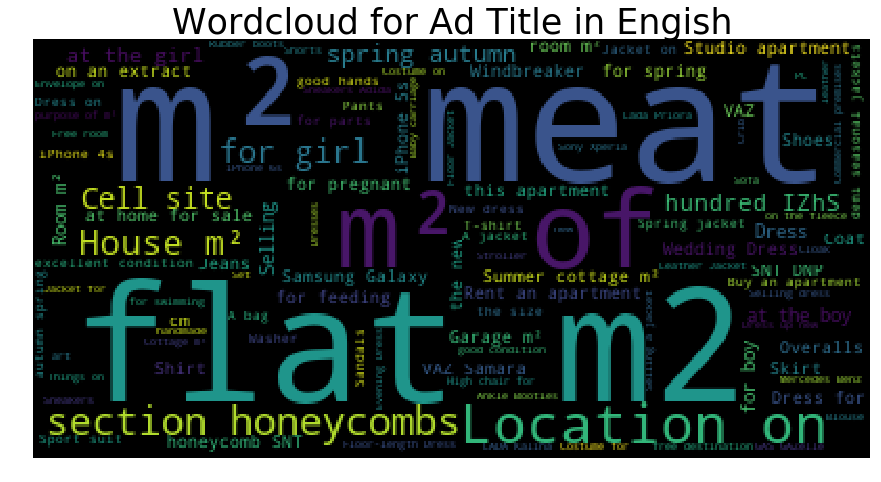

In [225]:
wc2 = WordCloud().generate_from_frequencies(temp_dict2)
plt.figure(figsize=(15,8))
plt.imshow(wc2)
plt.title("Wordcloud for Ad Title in Engish", fontsize=35)
plt.axis("off")
plt.show() 

In [5]:
# fill missing value and all in string
train_data_description = train_data['description'].fillna('NAN')

In [6]:
temp_list_russian = train_data_description.tolist()

In [7]:
from nltk.tokenize import word_tokenize
tokenized = [word_tokenize(doc.lower()) for doc in temp_list_russian]

In [8]:
from nltk.corpus import stopwords
stop = set(stopwords.words('russian'))
docs = [[word for word in words if word not in stop] for words in tokenized]

In [ ]:
# long time to run
#from nltk.stem import SnowballStemmer
#stemmer = SnowballStemmer('russian')
#russian_docs_lemma = [[stemmer.stem(word) for word in words] for words in docs]

In [9]:
import nltk
nltk.download('averaged_perceptron_tagger_ru')

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /Users/chenhuashi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_ru is already up-to-
[nltk_data]       date!


True

In [10]:
# count adj number in each description
from nltk import pos_tag
from tqdm import tqdm

Number = []
for item in tqdm(docs):
    adj = [word for word, pos in pos_tag(item, lang='rus') if pos.startswith('A=n') or pos.startswith('A=m') or pos.startswith('A=f')]
    Number.append(len(adj))

100%|██████████| 1503424/1503424 [1:10:31<00:00, 355.25it/s]


In [12]:
'''
import pickle

with open('NumberAdj.pkl', 'wb') as f:
    pickle.dump(Number, f)
'''

In [13]:
# read data from pickle
import pickle
Number = pickle.load( open( "NumberAdj.pkl", "rb" ) )

In [16]:
# count description length
train_data['description_length'] = train_data.description.apply(lambda x: len(str(x)))
number_description_length = train_data['description_length'].tolist()

In [17]:
# prob deal
prob_deal = train_data['deal_probability'].tolist()

In [18]:
new_df = pd.DataFrame({'Adj_Count':Number})
new_df['description_length'] = number_description_length
new_df['deal_probability'] = prob_deal

In [19]:
new_df.describe()

,Adj_Count,description_length,deal_probability
count,1.503424e+06,1.503424e+06,1.503424e+06
mean,2.532521e+00,1.782027e+02,1.391306e-01
std,4.037351e+00,2.879917e+02,2.600785e-01
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,4.100000e+01,0.000000e+00
50%,1.000000e+00,8.700000e+01,0.000000e+00
75%,3.000000e+00,1.860000e+02,1.508700e-01
max,1.280000e+02,3.212000e+03,1.000000e+00


Text(0.5,1,'Histogram of the number of Adj')

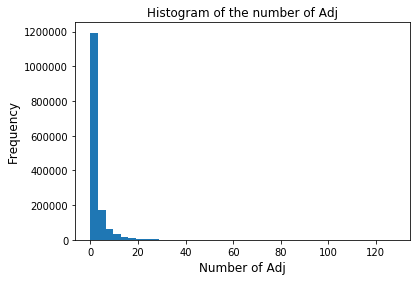

In [277]:
new_df['Adj_Count'].plot.hist(bins=40)
plt.xlabel('Number of Adj', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Histogram of the number of Adj")

Text(0.5,1,'Histogram of the description length')

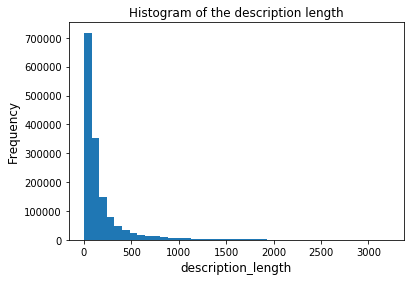

In [278]:
new_df['description_length'].plot.hist(bins=40)
plt.xlabel('description_length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Histogram of the description length")

In [20]:
def map_class(x):
    if x < 0.399:
        return 0
    else:
        return 1

new_df["class"] = new_df["deal_probability"].map(map_class)

In [21]:
new_df.head(10)

,Adj_Count,description_length,deal_probability,class
0,1,58,0.12789,0
1,0,41,0.00000,0
2,2,99,0.43177,1
3,0,22,0.80323,1
4,0,24,0.20797,0
5,1,19,0.80323,1
6,3,141,0.00000,0
7,1,30,0.80323,1
8,1,24,0.00000,0
9,2,65,0.00000,0


In [22]:
df_class1 = new_df.loc[new_df['class'] == 1, 'Adj_Count']

Text(0.5,1,'Histogram of the class with deal probability is 1')

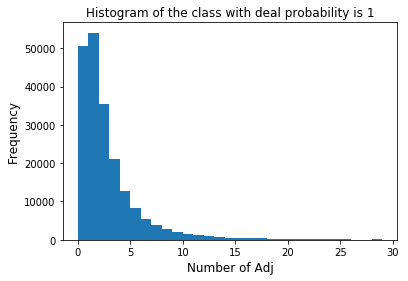

In [25]:
df_class1.plot.hist(bins=range(0, 30))
plt.xlabel('Number of Adj', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Histogram of the class with deal probability is 1")

In [27]:
df_class1.describe()

count    204217.000000
mean          2.455530
std           3.448722
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          61.000000
Name: Adj_Count, dtype: float64

In [28]:
df_class0= new_df.loc[new_df['class'] == 0, 'Adj_Count']

Text(0.5,1,'Histogram of the class with deal probability is 0')

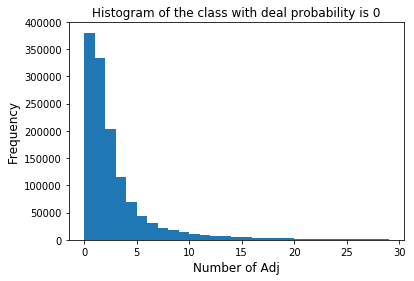

In [29]:
df_class0.plot.hist(bins=range(0, 30))
plt.xlabel('Number of Adj', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Histogram of the class with deal probability is 0")

In [30]:
df_class0.describe()

count    1.299207e+06
mean     2.544623e+00
std      4.122108e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      1.280000e+02
Name: Adj_Count, dtype: float64

In [40]:
from scipy import stats
import numpy as np
a = df_class1.values
np.random.shuffle(a)
temp_a = a[:1000]
b = df_class0.values
np.random.shuffle(b)
temp_b = b[:1000]
# perform Wmann-whitney test
stats.mannwhitneyu(temp_a, temp_b)

Ttest_indResult(statistic=-1.21103361798995, pvalue=0.22603326038662533)

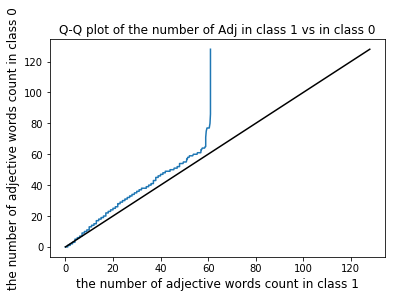

In [55]:
import numpy as np 
import pylab 
import scipy.stats as stats

#Calculate quantiles
test1 = a
test1.sort()
quantile_levels1 = np.arange(len(test1),dtype=float)/len(test1)

test2 = b
test2.sort()
quantile_levels2 = np.arange(len(test2),dtype=float)/len(test2)

#Use the smaller set of quantile levels to create the plot
quantile_levels = quantile_levels2

#We already have the set of quantiles for the smaller data set
quantiles2 = test2

#We find the set of quantiles for the larger data set using linear interpolation
quantiles1 = np.interp(quantile_levels,quantile_levels1,test1)

#Plot the quantiles to create the qq plot
pylab.plot(quantiles1,quantiles2)

#Add a reference line
maxval = max(test1[-1],test2[-1])
minval = min(test1[0],test2[0])
pylab.plot([minval,maxval],[minval,maxval],'k-')
plt.title("Q-Q plot of the number of Adj in class 1 vs in class 0")
plt.xlabel('the number of adjective words count in class 1', fontsize=12)
plt.ylabel('the number of adjective words count in class 0', fontsize=12)

pylab.show()

In [56]:
stats.mannwhitneyu(a, b)

MannwhitneyuResult(statistic=127009673057.0, pvalue=3.4888938968489297e-221)

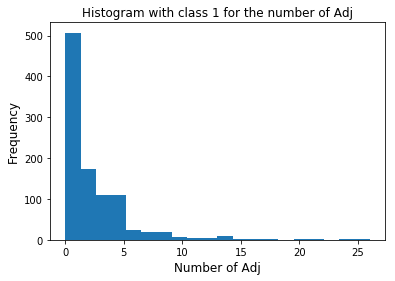

In [45]:
import matplotlib.pyplot as plt
plt.hist(temp_a, bins=20)  
plt.title("Histogram with class 1 for the number of Adj")
plt.xlabel('Number of Adj', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

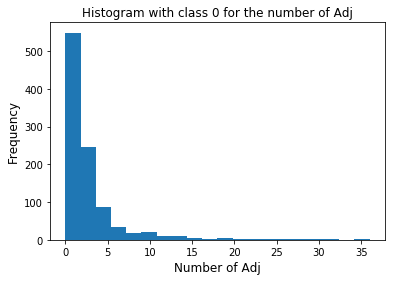

In [46]:
plt.hist(temp_b, bins=20)  
plt.title("Histogram with class 0 for the number of Adj")
plt.xlabel('Number of Adj', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [47]:
print (np.mean(temp_a),np.mean(temp_b))

2.374 2.574


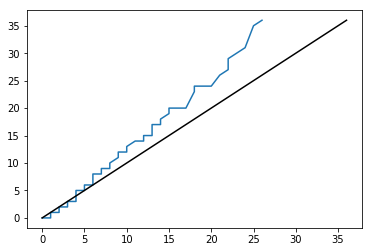

In [49]:
import numpy as np 
import pylab 
import scipy.stats as stats

#Calculate quantiles
test1 = temp_a
test1.sort()
quantile_levels1 = np.arange(len(test1),dtype=float)/len(test1)

test2 = temp_b
test2.sort()
quantile_levels2 = np.arange(len(test2),dtype=float)/len(test2)

#Use the smaller set of quantile levels to create the plot
quantile_levels = quantile_levels2

#We already have the set of quantiles for the smaller data set
quantiles2 = test2

#We find the set of quantiles for the larger data set using linear interpolation
quantiles1 = np.interp(quantile_levels,quantile_levels1,test1)

#Plot the quantiles to create the qq plot
pylab.plot(quantiles1,quantiles2)

#Add a reference line
maxval = max(test1[-1],test2[-1])
minval = min(test1[0],test2[0])
pylab.plot([minval,maxval],[minval,maxval],'k-')

pylab.show()

In [44]:
stats.mannwhitneyu(temp_a, temp_b)

MannwhitneyuResult(statistic=489680.0, pvalue=0.2069693403657668)

Text(0.5,1,'Histogram of the class with deal probability is 1')

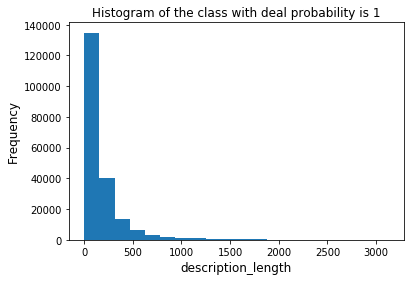

In [57]:
df_class3= new_df.loc[new_df['class'] == 1, 'description_length']
df_class3.plot.hist(bins=20)
plt.xlabel('description_length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Histogram of the class with deal probability is 1")

Text(0.5,1,'Histogram of the class with deal probability is 0')

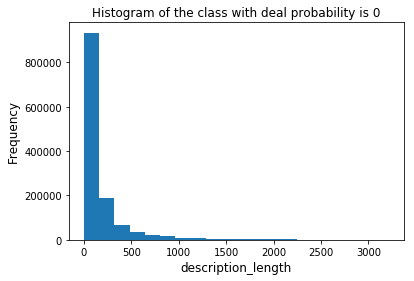

In [58]:
df_class4= new_df.loc[new_df['class'] == 0, 'description_length']
df_class4.plot.hist(bins=20)
plt.xlabel('description_length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Histogram of the class with deal probability is 0")

In [60]:
c = df_class3.values
np.random.shuffle(c)
temp_c = c[:1000]
d = df_class4.values
np.random.shuffle(d)
temp_d = d[:1000]
stats.mannwhitneyu(temp_c,temp_d)

MannwhitneyuResult(statistic=438162.5, pvalue=8.371400623924905e-07)

In [61]:
stats.mannwhitneyu(c,d)

MannwhitneyuResult(statistic=118259812562.5, pvalue=0.0)

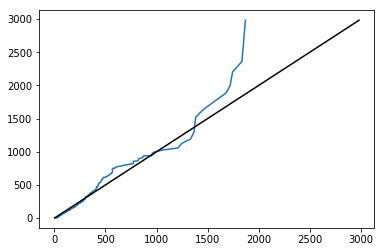

In [62]:
#Calculate quantiles
test1 = temp_c
test1.sort()
quantile_levels1 = np.arange(len(test1),dtype=float)/len(test1)

test2 = temp_d
test2.sort()
quantile_levels2 = np.arange(len(test2),dtype=float)/len(test2)

#Use the smaller set of quantile levels to create the plot
quantile_levels = quantile_levels2

#We already have the set of quantiles for the smaller data set
quantiles2 = test2

#We find the set of quantiles for the larger data set using linear interpolation
quantiles1 = np.interp(quantile_levels,quantile_levels1,test1)

#Plot the quantiles to create the qq plot
pylab.plot(quantiles1,quantiles2)

#Add a reference line
maxval = max(test1[-1],test2[-1])
minval = min(test1[0],test2[0])
pylab.plot([minval,maxval],[minval,maxval],'k-')

pylab.show()

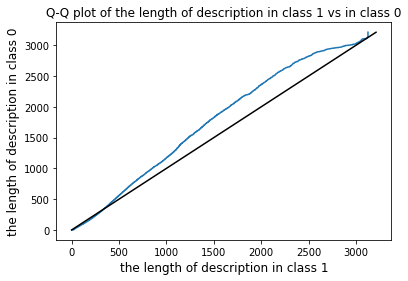

In [63]:
import numpy as np 
import pylab 
import scipy.stats as stats

#Calculate quantiles
test1 = c
test1.sort()
quantile_levels1 = np.arange(len(test1),dtype=float)/len(test1)

test2 = d
test2.sort()
quantile_levels2 = np.arange(len(test2),dtype=float)/len(test2)

#Use the smaller set of quantile levels to create the plot
quantile_levels = quantile_levels2

#We already have the set of quantiles for the smaller data set
quantiles2 = test2

#We find the set of quantiles for the larger data set using linear interpolation
quantiles1 = np.interp(quantile_levels,quantile_levels1,test1)

#Plot the quantiles to create the qq plot
pylab.plot(quantiles1,quantiles2)

#Add a reference line
maxval = max(test1[-1],test2[-1])
minval = min(test1[0],test2[0])
pylab.plot([minval,maxval],[minval,maxval],'k-')
plt.title("Q-Q plot of the length of description in class 1 vs in class 0")
plt.xlabel('the length of description in class 1', fontsize=12)
plt.ylabel('the length of description in class 0', fontsize=12)

pylab.show()

In [65]:
df_class3.describe()

count    204217.000000
mean        180.978768
std         249.004063
min           1.000000
25%          53.000000
50%         104.000000
75%         207.000000
max        3127.000000
Name: description_length, dtype: float64

In [66]:
df_class4.describe()

count    1.299207e+06
mean     1.777664e+02
std      2.936473e+02
min      1.000000e+00
25%      3.900000e+01
50%      8.400000e+01
75%      1.820000e+02
max      3.212000e+03
Name: description_length, dtype: float64

In [69]:
print (np.mean(temp_c),np.mean(temp_d))

2.836 2.305


In [84]:
train_data["desc_numOfWords"] = train_data_description.apply(lambda x: len(x.split()))
temp = train_data["desc_numOfWords"].value_counts().head(80)
trace = go.Bar(
    x = temp.index,
    y = temp.values,
)
data = [trace]
layout = go.Layout(
    title = "Number of words in description",
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

del train_data["desc_numOfWords"]

In [85]:
 new_df['percentage'] = 100.*new_df.Adj_Count/new_df.description_length

In [86]:
new_df['percentage'].describe()

count    1.503424e+06
mean     1.584267e+00
std      1.791334e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.298701e+00
75%      2.292264e+00
max      2.500000e+01
Name: percentage, dtype: float64

Text(0.5,1,'Histogram of the class with deal probability is 1')

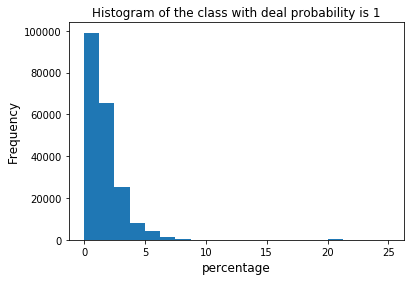

In [87]:
df_class5= new_df.loc[new_df['class'] == 1, 'percentage']
df_class5.plot.hist(bins=20)
plt.xlabel('percentage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Histogram of the class with deal probability is 1")

Text(0.5,1,'Histogram of the class with deal probability is 0')

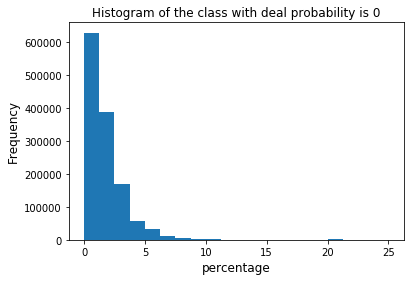

In [88]:
df_class6= new_df.loc[new_df['class'] == 0, 'percentage']
df_class6.plot.hist(bins=20)
plt.xlabel('percentage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title("Histogram of the class with deal probability is 0")

In [107]:
e = df_class5.values
np.random.shuffle(e)
temp_e = e[:1000]
f = df_class6.values
np.random.shuffle(f)
temp_f = f[:1000]
# perform Welch’s t-test
stats.mannwhitneyu(temp_e,temp_f)

MannwhitneyuResult(statistic=492502.0, pvalue=0.27837618722724755)

In [108]:
stats.mannwhitneyu(e,f)

MannwhitneyuResult(statistic=132489198145.0, pvalue=0.17144294752194367)

In [109]:
print(np.mean(temp_e), np.mean(temp_f))

1.4909005964590114 1.6235009075917906


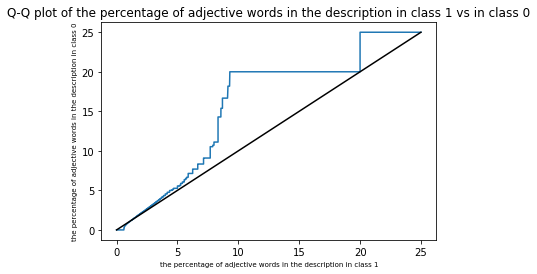

In [110]:
#Calculate quantiles
test1 = e
test1.sort()
quantile_levels1 = np.arange(len(test1),dtype=float)/len(test1)

test2 = f
test2.sort()
quantile_levels2 = np.arange(len(test2),dtype=float)/len(test2)

#Use the smaller set of quantile levels to create the plot
quantile_levels = quantile_levels2

#We already have the set of quantiles for the smaller data set
quantiles2 = test2

#We find the set of quantiles for the larger data set using linear interpolation
quantiles1 = np.interp(quantile_levels,quantile_levels1,test1)

#Plot the quantiles to create the qq plot
pylab.plot(quantiles1,quantiles2)

#Add a reference line
maxval = max(test1[-1],test2[-1])
minval = min(test1[0],test2[0])
pylab.plot([minval,maxval],[minval,maxval],'k-')
plt.title("Q-Q plot of the percentage of adjective words in the description in class 1 vs in class 0")
plt.xlabel('the percentage of adjective words in the description in class 1', fontsize=7)
plt.ylabel('the percentage of adjective words in the description in class 0', fontsize=7)

pylab.show()

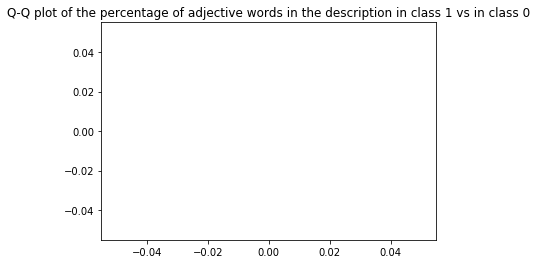

In [103]:
#Calculate quantiles
test1 = temp_e
test1.sort()
quantile_levels1 = np.arange(len(test1),dtype=float)/len(test1)

test2 = temp_f
test2.sort()
quantile_levels2 = np.arange(len(test2),dtype=float)/len(test2)

#Use the smaller set of quantile levels to create the plot
quantile_levels = quantile_levels2

#We already have the set of quantiles for the smaller data set
quantiles2 = test2

#We find the set of quantiles for the larger data set using linear interpolation
quantiles1 = np.interp(quantile_levels,quantile_levels1,test1)

#Plot the quantiles to create the qq plot
pylab.plot(quantiles1,quantiles2)

#Add a reference line
maxval = max(test1[-1],test2[-1])
minval = min(test1[0],test2[0])
pylab.plot([minval,maxval],[minval,maxval],'k-')
plt.title("Q-Q plot of the percentage of adjective words in the description in class 1 vs in class 0")

pylab.show()

In [ ]:
##########################TRAIN MODEL############################################################################

In [3]:
# fill missing value in training data
# need to transform price np.log(df["price"]+0.001)
train_data.price = train_data.groupby('category_name')['price'].apply(lambda x: x.fillna(x.mean()))
train_data['price'] = train_data.price.fillna(train_data.price.mean())
train_data['image'] = train_data['image'].fillna(0)
train_data['image_top_1'] = train_data['image_top_1'].fillna(0)

In [5]:
# fill missing value in testing data
test_data.price = test_data.groupby('category_name')['price'].apply(lambda x: x.fillna(x.mean()))
test_data['price'] = test_data.price.fillna(train_data.price.mean())
test_data['image'] = test_data['image'].fillna(0)
test_data['image_top_1'] = test_data['image_top_1'].fillna(0)

In [ ]:
# 2017-3-15
min(train_data.activation_date.tolist())
# 2017-4-07
max(train_data.activation_date.tolist())

In [ ]:
# 2017-4-12
min(test_data.activation_date.tolist())
# 2017-4-20
max(test_data.activation_date.tolist())

In [ ]:
test_data.head(10)

In [5]:
# concat train and test data that part used for train and the rest used for validation
combined_data = pd.concat([train_data, test_data],axis=0)
combined_data.shape

(2011862, 18)

In [12]:
combined_data.head(10)

,activation_date,category_name,city,deal_probability,description,image,image_top_1,item_id,item_seq_number,param_1,param_2,param_3,parent_category_name,price,region,title,user_id,user_type
0,2017-03-28,Товары для детей и игрушки,Екатеринбург,0.12789,"Кокон для сна малыша,пользовались меньше месяц...",d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,b912c3c6a6ad,2,Постельные принадлежности,NaN,NaN,Личные вещи,400.0,Свердловская область,Кокоби(кокон для сна),e00f8ff2eaf9,Private
1,2017-03-26,Мебель и интерьер,Самара,0.00000,"Стойка для одежды, под вешалки. С бутика.",79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,2dac0150717d,19,Другое,NaN,NaN,Для дома и дачи,3000.0,Самарская область,Стойка для Одежды,39aeb48f0017,Private
2,2017-03-20,Аудио и видео,Ростов-на-Дону,0.43177,"В хорошем состоянии, домашний кинотеатр с blu ...",b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,ba83aefab5dc,9,"Видео, DVD и Blu-ray плееры",NaN,NaN,Бытовая электроника,4000.0,Ростовская область,Philips bluray,91e2f88dd6e3,Private
3,2017-03-25,Товары для детей и игрушки,Набережные Челны,0.80323,Продам кресло от0-25кг,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,02996f1dd2ea,286,Автомобильные кресла,NaN,NaN,Личные вещи,2200.0,Татарстан,Автокресло,bf5cccea572d,Company
4,2017-03-16,Автомобили,Волгоград,0.20797,Все вопросы по телефону.,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,7c90be56d2ab,3,С пробегом,ВАЗ (LADA),2110,Транспорт,40000.0,Волгоградская область,"ВАЗ 2110, 2003",ef50846afc0b,Private
5,2017-03-28,Товары для детей и игрушки,Чистополь,0.80323,В хорошем состоянии,eb6ad1231c59d3dc7e4020e724ffe8e4d302023ddcbb99...,796.0,51e0962387f7,9,Автомобильные кресла,NaN,NaN,Личные вещи,1300.0,Татарстан,Авто люлька,bbfad0b1ad0a,Private
6,2017-03-23,Ремонт и строительство,Нижний Новгород,0.00000,Электро водонагреватель накопительный на 100 л...,0330f6ac561f5db1fa8226dd5e7e127b5671d44d075a98...,2823.0,c4f260a2b48a,125,Сантехника и сауна,NaN,NaN,Для дома и дачи,11000.0,Нижегородская область,Водонагреватель 100 литров нержавейка плоский,08f469d2e6f7,Private
7,2017-03-25,"Одежда, обувь, аксессуары",Пермь,0.80323,Бойфренды в хорошем состоянии.,9bab29a519e81c14f4582024adfebd4f11a4ac71d323a6...,567.0,6b71309d6a8a,61,Женская одежда,Джинсы,26,Личные вещи,500.0,Пермский край,Бойфренды colins,fef86baa002c,Private
8,2017-03-17,"Одежда, обувь, аксессуары",Оренбург,0.00000,54 раз мер очень удобное,75ce06d1f939a31dfb2af8ac55f08fa998fa336d13ee05...,415.0,c5b969cb63a2,85,Женская одежда,Платья и юбки,> 50 (XXL),Личные вещи,500.0,Оренбургская область,Платье,055825270190,Private
9,2017-03-22,Детская одежда и обувь,Нижний Новгород,0.00000,По стельке 15.5см мерить приокский район. Цвет...,54fb8521135fda77a860bfd2fac6bf46867ab7c06796e3...,46.0,b1570962e68c,136,Для девочек,Обувь,25,Личные вещи,400.0,Нижегородская область,Полу ботиночки замш натур.Бамбини,f9e8f831d94c,Company


In [6]:
import numpy as np
# price feature
combined_data["price"] = np.log(combined_data["price"]+0.001)
combined_data["price"].fillna(combined_data.price.mean(),inplace=True)

In [7]:
combined_data["image_top_1"].fillna(-999,inplace=True)

In [8]:
# Convert time in dataframe
# train_data convert for feature engineering 
# feature of day, weekday, and week (error)
train_data.activation_date = pd.to_datetime(train_data.activation_date)
train_data['day_of_month'] = train_data.activation_date.apply(lambda x: x.day)
train_data['day_of_week'] = train_data.activation_date.apply(lambda x: x.weekday())
#train_data['week_of_year'] = train_data.activation_date.apply(lambda x: x.week())
train_data['week_of_year'] = train_data.activation_date.dt.week


# converted for whole dataset
combined_data.activation_date = pd.to_datetime(combined_data.activation_date)
combined_data['day_of_month'] = combined_data.activation_date.apply(lambda x: x.day)
combined_data['day_of_week'] = combined_data.activation_date.apply(lambda x: x.weekday())
#combined_data['week_of_year'] = combined_data.activation_date.apply(lambda x: x.week())
combined_data['week_of_year'] = combined_data.activation_date.dt.week

In [9]:
# speed up the loop
from tqdm import tqdm

category_column = ['region','city','parent_category_name','category_name','user_type','image_top_1','item_seq_number','day_of_month','day_of_week']
for item in tqdm(category_column):
        groupBy = train_data.groupby(item)['deal_probability']
        mean = groupBy.mean()
        std = groupBy.std()
        combined_data[item + '_deal_probability_mean'] = combined_data[item].map(mean)
        combined_data[item + '_deal_probability_std'] = combined_data[item].map(std)

for item in tqdm(category_column):
        groupBy = train_data.groupby(item)['price']
        mean = groupBy.mean()
        std = groupBy.std()
        combined_data[item + '_price_mean'] = combined_data[item].map(mean)
        combined_data[item + '_price_std'] = combined_data[item].map(std)

100%|██████████| 9/9 [00:04<00:00,  1.96it/s]


In [10]:
# Compute description tf-idf for whole dataset
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk.corpus import stopwords

# fill NaN as blank
combined_data['description'] = combined_data['description'].fillna(' ')
# test on different value of max_features
tfidf_vectorizer = TfidfVectorizer(max_features = 500,
                                   stop_words=stopwords.words('russian'))
tfidf_matrix = np.array(tfidf_vectorizer.fit_transform(combined_data['description']).todense(),dtype=np.float16)
# assign tf-idf into dataframe
for i in range(500):
    combined_data['tf_idf_' + str(i)] = tfidf_matrix[:,i]

In [11]:
# Encode labels with value between 0 and n-classes-1 for whole dataset
from sklearn.preprocessing import LabelEncoder

category_column_new = ['region','city','parent_category_name','category_name','user_type','param_1','image_top_1']
for item in category_column_new:
    
    combined_data[item].fillna('NaN')
    combined_data[item] = LabelEncoder().fit_transform(combined_data[item].astype(str))  
    #combined_data[item] = LabelEncoder().fit_transform(combined_data[item].values)

In [15]:
# Count length of text for whole dataset
#combined_data['title_length'] = combined_data.title.apply(lambda x: len(str(x)))
#combined_data['description_length'] = combined_data.description.apply(lambda x: len(str(x)))

In [12]:
# clean title and text by removing special characters
import re
def clean_word(text):
    try:
        textProc = text.lower()
        textProc = re.sub('[!@#$_“”¨«»®´·º½¾¿¡§£₤‘’]', '', textProc)
        textProc = " ".join(textProc.split())
        return textProc
    except: 
        return "name error"

In [13]:
combined_data['title'] = combined_data['title'].apply(lambda x: clean_word(x))
combined_data["description"]   = combined_data["description"].apply(lambda x: clean_word(x))

text_feature = ["description", "title"]

for cols in text_feature:
    combined_data[cols] = combined_data[cols].astype(str) 
    combined_data[cols] = combined_data[cols].astype(str).fillna('NaN') # FILL NaN
    combined_data[cols] = combined_data[cols].str.lower() 
    combined_data[cols + '_length'] = combined_data[cols].apply(lambda x: len(x.split()))
    combined_data[cols + '_num_unique_words'] = combined_data[cols].apply(lambda x: len(set(w for w in x.split())))
    combined_data[cols + '_unique_percentage'] = combined_data[cols+'_num_unique_words'] / combined_data[cols+'_length'] * 100

In [14]:
combined_data.head(5)

,activation_date,category_name,city,deal_probability,description,image,image_top_1,item_id,item_seq_number,param_1,...,tf_idf_496,tf_idf_497,tf_idf_498,tf_idf_499,description_length,description_num_unique_words,description_unique_percentage,title_length,title_num_unique_words,title_unique_percentage
0,2017-03-28,42,462,0.12789,"кокон для сна малыша,пользовались меньше месяц...",d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,13,b912c3c6a6ad,2,249,...,0.0,0.0,0.0,0.0,7,7,100.0,3,3,100.0
1,2017-03-26,22,1314,0.00000,"стойка для одежды, под вешалки. с бутика.",79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,2723,2dac0150717d,19,122,...,0.0,0.0,0.0,0.0,7,7,100.0,3,3,100.0
2,2017-03-20,2,1290,0.43177,"в хорошем состоянии, домашний кинотеатр с blu ...",b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,2260,ba83aefab5dc,9,84,...,0.0,0.0,0.0,0.0,17,17,100.0,2,2,100.0
3,2017-03-25,42,950,0.80323,продам кресло от0-25кг,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,2838,02996f1dd2ea,286,38,...,0.0,0.0,0.0,0.0,3,3,100.0,1,1,100.0
4,2017-03-16,0,318,0.20797,все вопросы по телефону.,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,1408,7c90be56d2ab,3,278,...,0.0,0.0,0.0,0.0,4,4,100.0,3,3,100.0


In [15]:
final_data = combined_data.drop(['user_id', 'description', 'image', 'item_id', 'param_2', 'param_3', 'title'],axis=1)

In [ ]:
final_data.head(10)

In [16]:
len(list(final_data))

556

In [17]:
from sklearn.model_selection import train_test_split

X = final_data.loc[final_data.activation_date<=pd.to_datetime('2017-04-07')]
X_test = final_data.loc[final_data.activation_date>=pd.to_datetime('2017-04-08')]

Y = X.deal_probability
X = X.drop(['activation_date', 'deal_probability'], axis=1)
X_test = X_test.drop(['activation_date', 'deal_probability'], axis=1)

# split train and validation
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2)

In [18]:
print (X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape,X_test.shape)

(1202739, 554) (300685, 554) (1202739,) (300685,) (508438, 554)


In [25]:
final_data.isnull().sum()

activation_date                                    0
category_name                                      0
city                                               0
deal_probability                              508438
image_top_1                                        0
item_seq_number                                    0
param_1                                            0
parent_category_name                               0
price                                              0
region                                             0
user_type                                          0
day_of_month                                       0
day_of_week                                        0
region_deal_probability_mean                       0
region_deal_probability_std                        0
city_deal_probability_mean                        43
city_deal_probability_std                        171
parent_category_name_deal_probability_mean         0
parent_category_name_deal_probability_std     

In [19]:
import xgboost as xgb

params = {'eta': 0.3,
          'tree_method': "hist",
          'grow_policy': "lossguide",
          'max_leaves': 1400,  
          'max_depth': 0, 
          'subsample': 0.9, 
          'colsample_bytree': 0.7, 
          'colsample_bylevel':0.7,
          'min_child_weight':0,
          'alpha':4,
          'objective': 'reg:logistic', 
          'eval_metric': 'rmse', 
          'random_state': 99, 
          'silent': True}

training_data = xgb.DMatrix(X_train, Y_train)
validating_data = xgb.DMatrix(X_validation, Y_validation)

KeyboardInterrupt: 

In [ ]:
watchlist = [(training_data, 'train'), (validating_data, 'valid')]
num_round = 2000
model = xgb.train(params, training_data, num_round, watchlist, maximize=False, early_stopping_rounds = 50, verbose_eval=5)

In [ ]:
from lib import XGBHelper as xgbh
print("1000 Iterations")
xgbh.visualize_features(model)

In [26]:
X_test = xgb.DMatrix(X_test)
Y_pred = model.predict(X_test, ntree_limit=model.best_ntree_limit, output_margin=True)
Y_test = X_test.get_label()

TypeError: can not initialize DMatrix from DMatrix

In [ ]:
## For 1000 interations
thresholds_1000 = sorted(np.unique(np.round(Y_pred, 2)))
error_cuv_1000, error_ger_1000 = xgbh.get_error_values(Y_pred, Y_test, thresholds_1000)

In [ ]:
plt.figure(figsize=(8, 6))

legends = legends + ['Cuviers_1000', 'Gervais_1000']
xgbh.get_margin_plot(error_cuv_1000, error_ger_1000, thresholds_1000, legends = legends, style=['b', 'r'])

plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()

In [ ]:
plt.figure(figsize=(9, 6))

legends = legends + ['Cuviers_1000', 'Gervais_1000']
xgbh.get_margin_plot(error_cuv_1000, error_ger_1000, thresholds_1000, legends = legends, style=['b', 'r'])

plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

plt.xlim([-0.2, 0.2])
plt.ylim([0, 0.2])
plt.show()

In [38]:
sub = pd.read_csv('test_sample_sub.csv')
sub['deal_probability'] = Y_pred
sub['deal_probability'].clip(0.0, 1.0, inplace=True)
sub.to_csv('xgb_with_mean_encode_and_nlp.csv', index=False)
sub.head()

,item_id,deal_probability
0,6544e41a8817,0.028340
1,65b9484d670f,0.129864
2,8bab230b2ecd,0.173597
3,8e348601fefc,0.238165
4,8bd2fe400b89,0.195694
